In [1]:
import optuna
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
from sklearn.model_selection import KFold
import pandas as pd
from yikit.models import Objective
from yikit.tools.visualization import get_learning_curve_optuna

In [2]:
SEED = 334

In [3]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
y = pd.Series(diabetes.target)

In [4]:
rf = RandomForestRegressor(n_jobs = -1, random_state = SEED)

In [5]:
objective = Objective(rf, X, y, scoring = 'neg_root_mean_squared_error', n_jobs = -1, random_state = SEED, cv = KFold(n_splits=5, shuffle=True, random_state=SEED))

In [6]:
study = optuna.create_study(direction = 'maximize', sampler = objective.sampler)
study.optimize(objective, n_trials = 100)

[I 2022-06-27 21:00:37,144] A new study created in memory with name: no-name-d3de23f2-b6aa-451a-849c-19aba0a2fdc1
[I 2022-06-27 21:00:41,225] Trial 0 finished with value: -57.455463632799 and parameters: {'min_samples_split': 7, 'max_depth': 22, 'n_estimators': 54}. Best is trial 0 with value: -57.455463632799.
[I 2022-06-27 21:00:41,496] Trial 1 finished with value: -58.32648788859469 and parameters: {'min_samples_split': 7, 'max_depth': 88, 'n_estimators': 10}. Best is trial 0 with value: -57.455463632799.
[I 2022-06-27 21:00:41,969] Trial 2 finished with value: -57.16901010815635 and parameters: {'min_samples_split': 16, 'max_depth': 70, 'n_estimators': 102}. Best is trial 2 with value: -57.16901010815635.
[I 2022-06-27 21:00:42,591] Trial 3 finished with value: -57.91275228132698 and parameters: {'min_samples_split': 5, 'max_depth': 92, 'n_estimators': 271}. Best is trial 2 with value: -57.16901010815635.
[I 2022-06-27 21:00:42,942] Trial 4 finished with value: -58.54299044152187 a

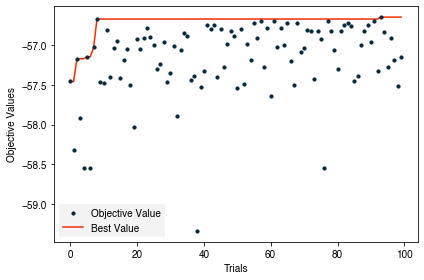

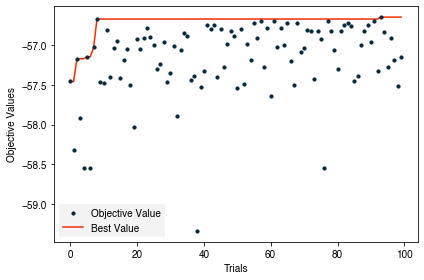

In [7]:
get_learning_curve_optuna(study)

In [8]:
rf_opt = clone(rf).set_params(**study.best_params)

In [9]:
kf = KFold(n_splits = 5, shuffle = True, random_state = SEED)
for i_train, i_test in kf.split(X, y):
    rf_opt = clone(rf_opt)
    X_train, y_train = X.loc[i_train], y[i_train]
    X_test, y_test = X.loc[i_test], y[i_test]

    rf_opt.fit(X_train, y_train)
    print(mean_squared_error(y_test, rf_opt.predict(X_test), squared = False))

58.3407607781818
56.08609558307647
56.450534066692285
61.879735088026464
50.57079550743379
